## 1. 导入数据



In [8]:
# 导入 pandas 读取数据
import pandas as pd
import numpy as np
import  torch 
import torch.utils.data as Data
from    torch.nn import functional as F
from    matplotlib import pyplot as plt
from torch import Tensor
# 读取数据
data = np.loadtxt('../data/01-10/S01/UV_DFT_results/001.001_sig-UV-DFT.txt')
data2 = np.loadtxt('../data/01-10/S01/CD_DFT_results/001.001_sig-CD-DFT.txt')

# m * n 
print("数据矩阵 data.shape：",data.shape)



/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


数据矩阵 data.shape： (10417, 2)


In [10]:

import urllib2


ModuleNotFoundError: No module named 'urllib2'

In [24]:
file_name[:8]

'1Q3Y.pdb'

In [22]:

def un_gzfile(gz_path):
    # 异常处理
    try:
        # 压缩文件解压
        for f in  os.listdir(gz_path):
            if ".gz" in f:
                g = gzip.GzipFile(mode="rb", fileobj=open(gz_path+"\\"+f, 'rb'))
                open(gz_path+"\\"+f.replace(".gz",""), "wb").write(g.read())
    except Exception as e:
        print(e)
    else:
        print("文件解压成功!")

In [35]:
'../data/NMR/'+file_name

'../data/NMR/1Q3Y.pdb.gz'

In [48]:
import gzip
import os
def un_gz(file_name):
    readfile_name='../data/NMR/'+file_name
    if ".pdb" in file_name:
        f_name = '../data/NMR/pdb/'+file_name.replace(".gz", "")
    else:
        f_name = '../data/NMR/mr/'+file_name.replace(".gz", "")

    #获取文件的名称，去掉
    g_file = gzip.GzipFile(readfile_name)

    #建gzip对象
    if os.path.isdir(f_name):
        temp_file_path = os.path.isdir(f_name)
    else:
        open(f_name, "wb+")
    open(f_name, "wb+").write(g_file.read())
    #gzip对象用read()打开后，写入open()建立的文件里。
    g_file.close() #关闭gzip对象


In [57]:
Nametest = []
path = '../data/NMR/pdb/'
for file_name in os.listdir(path):

    Nametest.append(file_name)
    
print(len(Nametest))

17468


In [54]:
import os
NameString = []
path = '../data/NMR/'
for file_name in os.listdir(path):
    if ".gz" in file_name:
        un_gz(file_name)
    
print(len(NameString))

0


In [32]:
import  torch 
from    torch import nn, optim, autograd

class Net(nn.Module):

    #构造函数
    def __init__(self):
        super(Net, self).__init__()
        self.model=nn.Sequential(
            nn.Linear(1,100),
            nn.Linear(100,1)
    )

    #前向传播
    def forward(self, input):
        #卷积 --> 激活函数（Relu) --> 池化
        y=self.model(input)

        return y




In [26]:
x=torch.rand((1200,1)) 
y=torch.sin(x)+torch.exp(-x)
torch_dataset = Data.TensorDataset(x, y)


train_size = int(len(torch_dataset) * 0.8)
validate_size = int(len(torch_dataset) * 0.1)
test_size = len(torch_dataset) - validate_size - train_size

train_dataset, validate_dataset, test_dataset = torch.utils.data.random_split(torch_dataset, [train_size, validate_size, test_size],generator=torch.Generator().manual_seed(23))


train_loader = Data.DataLoader(
    dataset=torch_dataset,      # 数据，封装进Data.TensorDataset()类的数据
    batch_size=8,      # 每块的大小
    shuffle=False,               # 要不要打乱数据 (不打乱比较好)
    num_workers=2,              # 多进程（multiprocess）来读数据
)
val_loader = Data.DataLoader(
    dataset=validate_dataset,      # 数据，封装进Data.TensorDataset()类的数据
    batch_size=8,      # 每块的大小
    shuffle=False,               # 要不要打乱数据 (不打乱比较好)
    num_workers=2,              # 多进程（multiprocess）来读数据
)
tes_loader = Data.DataLoader(
    dataset=test_dataset,      # 数据，封装进Data.TensorDataset()类的数据
    batch_size=8,      # 每块的大小
    shuffle=False,               # 要不要打乱数据 (不打乱比较好)
    num_workers=2,              # 多进程（multiprocess）来读数据
)
l2_loss_fn = torch.nn.MSELoss(reduce=False, size_average=True)
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [40]:
net = Net()

optim_D  = optim.Adam(net.parameters(), lr=1e-5)

for i in range(10):
    #x = next(data_iter)
    for batch_x,batch_y in train_loader:
        #print(batch_x.shape)
            
        yhat = net(batch_x)
        loss_D = l2_loss_fn(batch_y,yhat).mean()
        optim_D.zero_grad()
        loss_D.backward()
        
        optim_D.step()
    print(loss_D)

tensor(0.8706, grad_fn=<MeanBackward0>)
tensor(0.7304, grad_fn=<MeanBackward0>)
tensor(0.6079, grad_fn=<MeanBackward0>)
tensor(0.5017, grad_fn=<MeanBackward0>)
tensor(0.4101, grad_fn=<MeanBackward0>)
tensor(0.3318, grad_fn=<MeanBackward0>)
tensor(0.2655, grad_fn=<MeanBackward0>)
tensor(0.2099, grad_fn=<MeanBackward0>)
tensor(0.1639, grad_fn=<MeanBackward0>)
tensor(0.1262, grad_fn=<MeanBackward0>)


In [39]:
loss_D

tensor(1.2926, grad_fn=<MeanBackward0>)

In [1]:
import matplotlib.pyplot as plt
x1=[i for i in range(100)]

#plt.plot(torch.cat((realpd1,pd1.cpu().detach().reshape(100,1)),1),'g')
plt.plot(realpd1.cpu().detach().reshape(100,1)+2,'r') 
plt.plot((pd1.cpu().detach().reshape(100,1))/2+5) 
plt.xlabel('FPR')
plt.ylabel('PD')

plt.show()

34

In [5]:
X=data2[:,1].reshape(1,10417)

In [14]:
import torch
from torch.utils.data import random_split
dataset = range(13)
torch.manual_seed(2)
train_dataset,test_dataset = random_split(
    dataset = dataset,
    lengths = [6,7],
)
print(list(train_dataset))
print(list(test_dataset))


[5, 4, 7, 2, 12, 8]
[1, 0, 3, 6, 10, 9, 11]


In [18]:
align_cd= np.loadtxt('../data/0804/3000results/光谱/3000_cd.csv',delimiter=',',dtype=np.str,encoding='UTF-8-sig')
align_cd =align_cd.astype(np.float) 

/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [4]:
from pretreatment import Pretreatment as pre



## 2. 数据绘制



/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28436 (\N{CJK UNIFIED IDEOGRAPH-6F14}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/wd/anaconda3/envs/3DMC_new/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


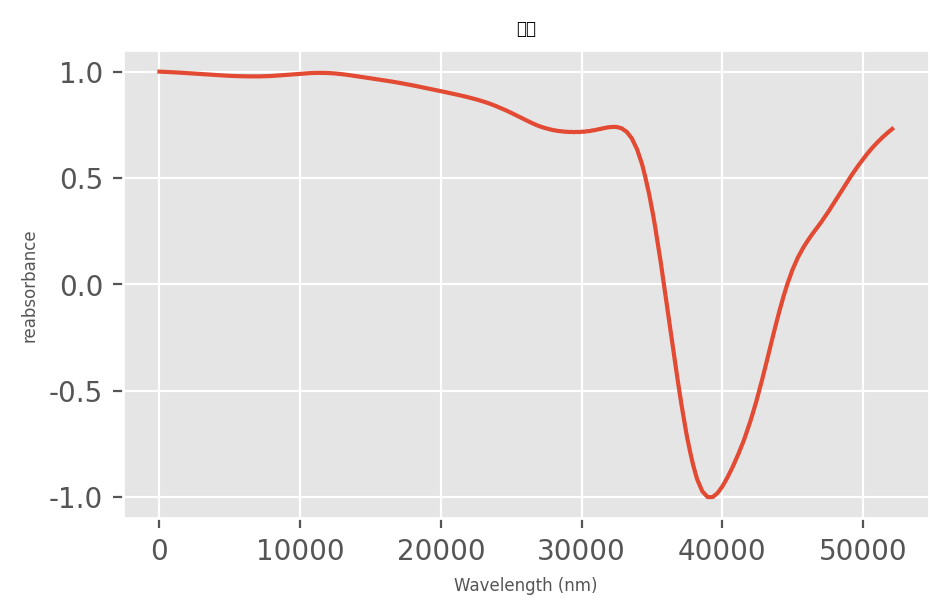

In [6]:
from pretreatment import Pretreatment as pre
p = pre()

# 该方法为快速示例 而编写 
# 测试用例 图片名 波段起始点 波段间距
p.PlotSpectrum(X, '演示', 0, 5).show()
## 为保证数据可以正确绘制 请将 矩阵转化为 numpy.ndarray 格式




## 3. 数据预处理

### 标准正态变换 MSC



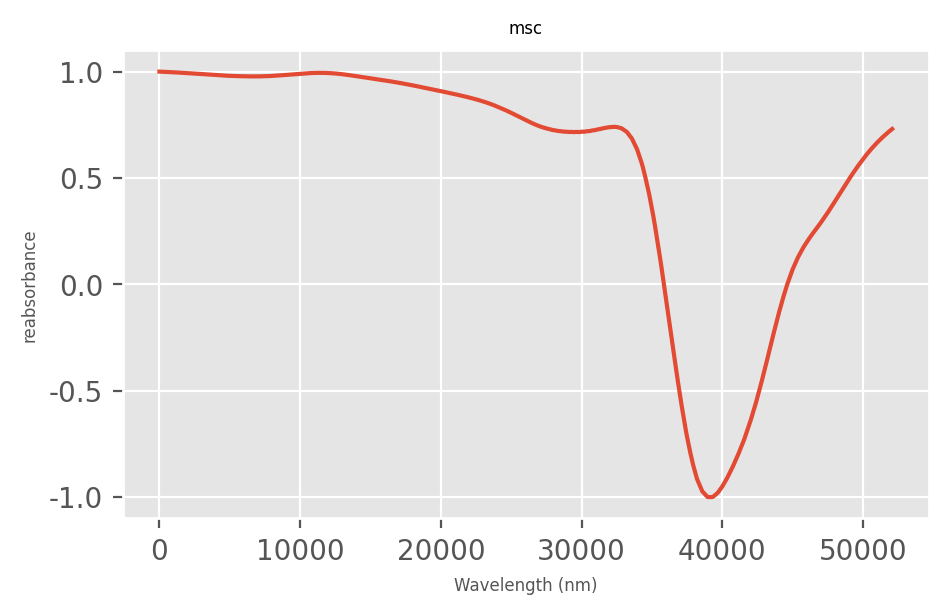

In [10]:
msc = p.msc(X)
p.PlotSpectrum(msc, 'msc', 0, 5).show()

In [26]:
X.shape

(1, 10417)



### 多元散射校正 SNV




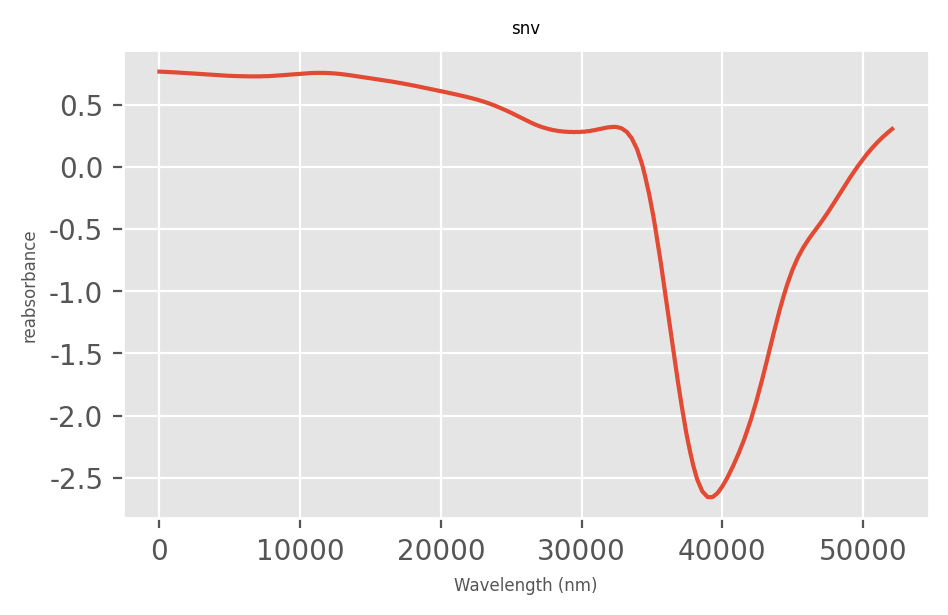

In [11]:
snv = p.snv(X)
p.PlotSpectrum(snv, 'snv', 0, 5).show()



### Savitzky-Golay平滑滤波函数 SG



<function matplotlib.pyplot.show(close=None, block=None)>

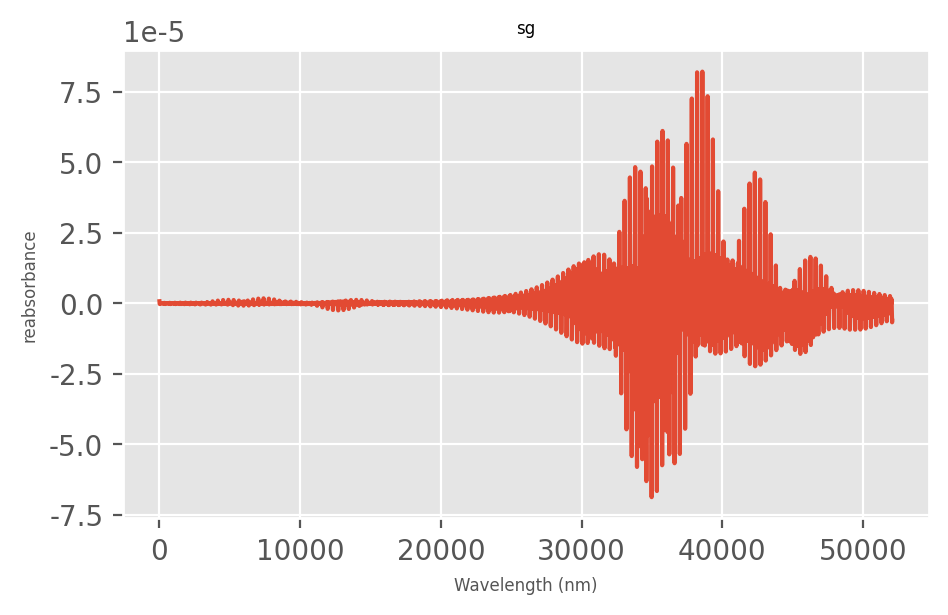

In [12]:
# 此处参数为参考 具体 后续 详述
sg = p.SG(X, 4*5+1,2*3,2)
p.PlotSpectrum(sg, 'sg', 0, 5).show





### 滑动平均滤波 move_avg




In [13]:
move_avg = p.move_avg(X)
p.PlotSpectrum(move_avg, 'move_avg', 0, 5).show

IndexError: tuple index out of range




### 一阶差分 D1




<function matplotlib.pyplot.show(close=None, block=None)>

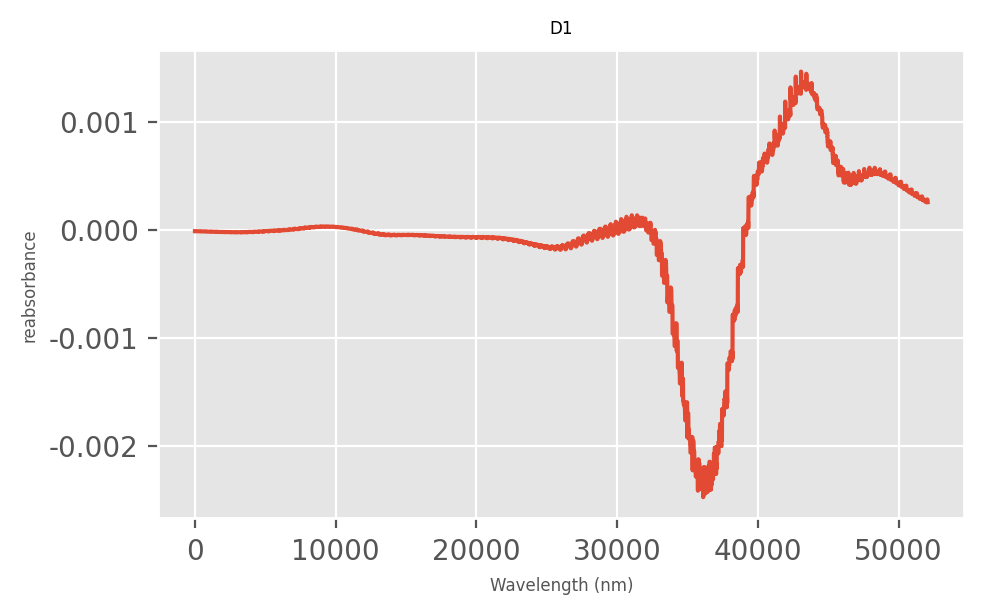

In [14]:
D1 = p.D1(X)
p.PlotSpectrum(D1, 'D1', 0, 5).show



### 二阶差分 D2





<function matplotlib.pyplot.show(close=None, block=None)>

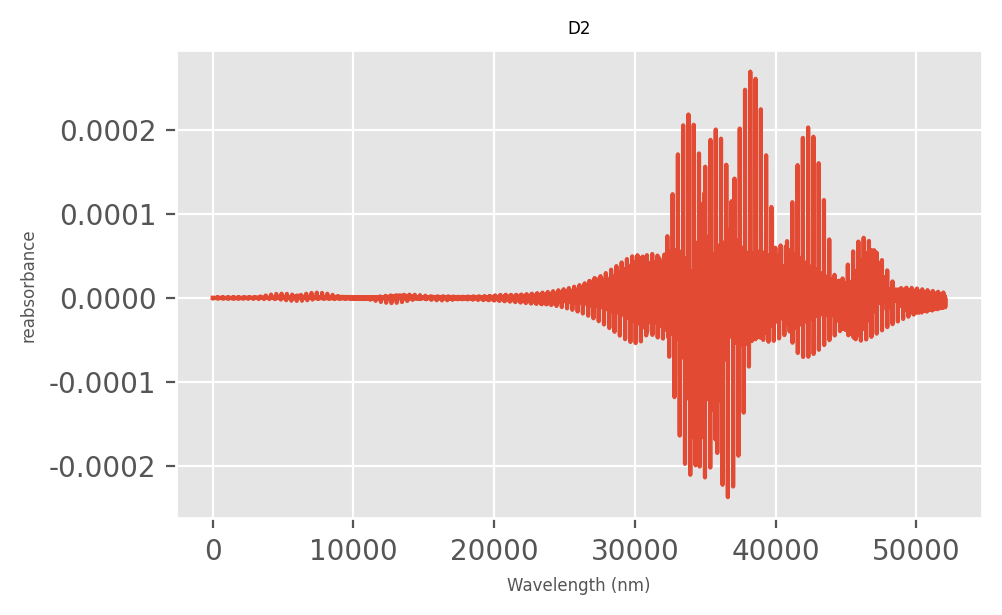

In [15]:
D2 = p.D2(X)
p.PlotSpectrum(D2, 'D2', 0, 5).show

In [20]:
D2.shape

(1, 10415)



### 小波变换 wave




In [21]:
wave = p.wave(X)
p.PlotSpectrum(wave, 'wave', 0, 5).show

IndexError: tuple index out of range



### 均值中心化 mean_centralization





<function matplotlib.pyplot.show(close=None, block=None)>

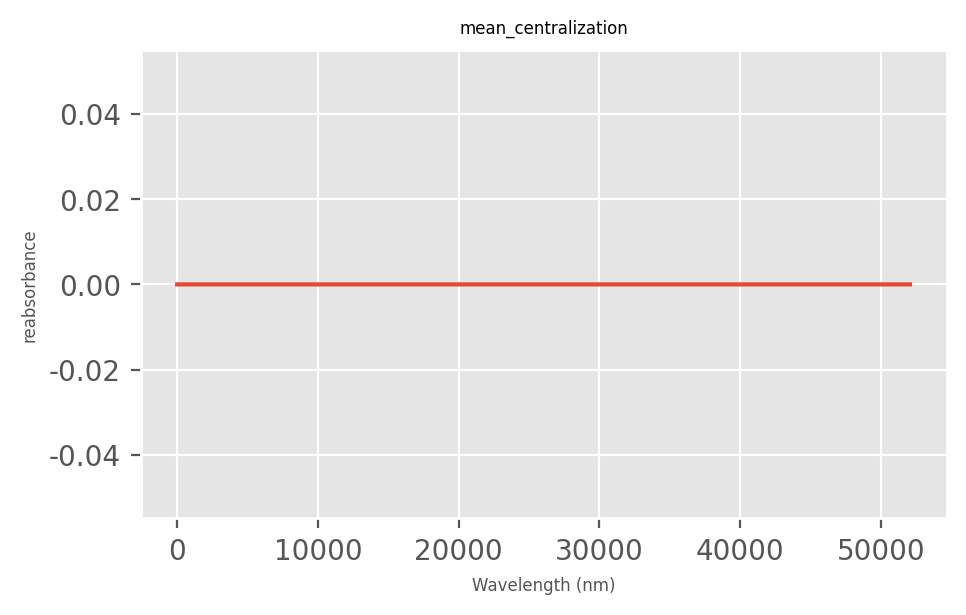

In [22]:
mean_centralization = p.mean_centralization(X)
p.PlotSpectrum(mean_centralization, 'mean_centralization', 0, 5).show



### 标准化 standardlize




<function matplotlib.pyplot.show(close=None, block=None)>

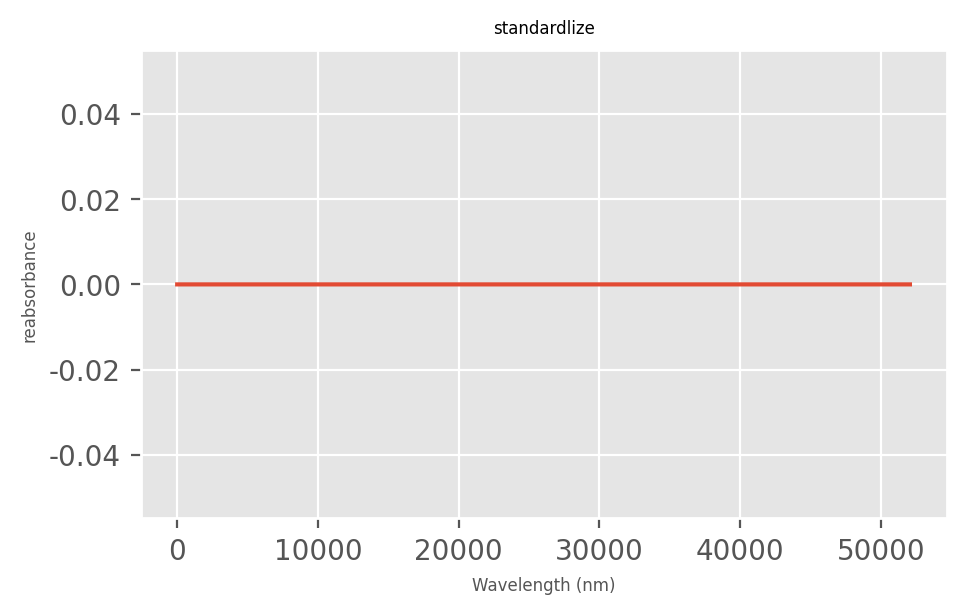

In [23]:
standardlize = p.standardlize(X)
p.PlotSpectrum(standardlize, 'standardlize', 0, 5).show




### 最大最小归一化 max_min_normalization





<function matplotlib.pyplot.show(close=None, block=None)>

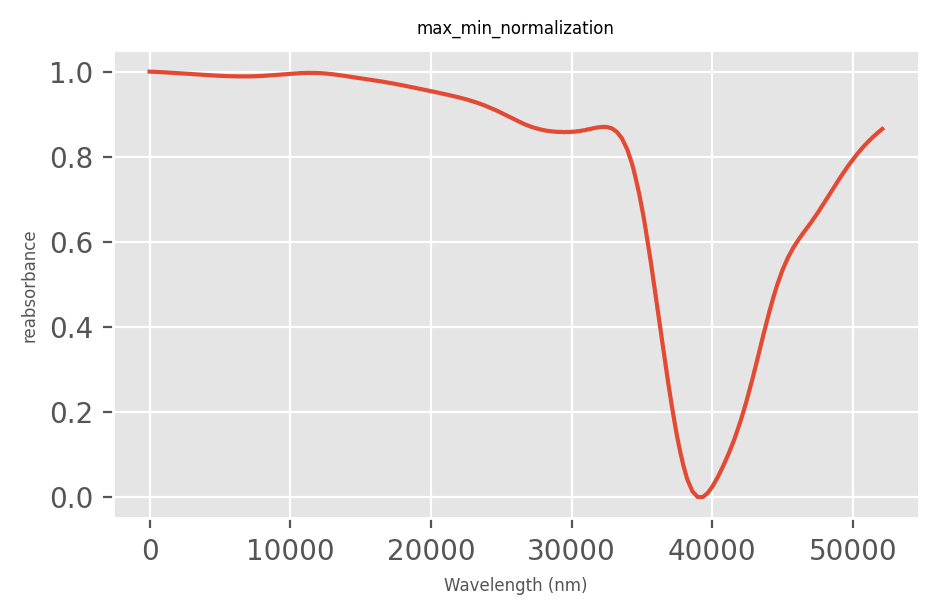

In [24]:
max_min_normalization = p.max_min_normalization(X)
p.PlotSpectrum(max_min_normalization, 'max_min_normalization', 0, 5).show

### 矢量归一化 vector_normalization

<function matplotlib.pyplot.show(close=None, block=None)>

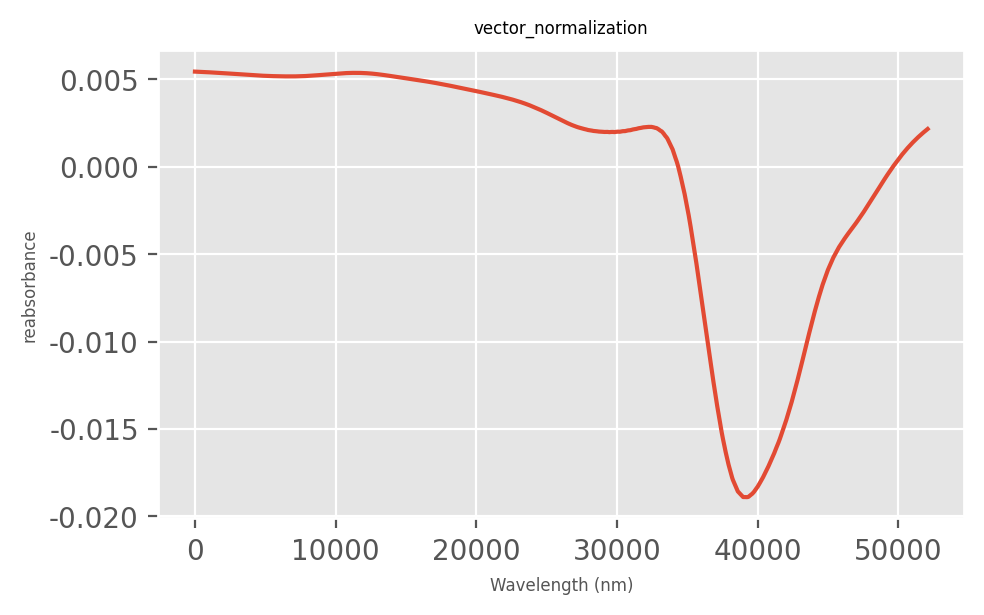

In [25]:
vector_normalization = p.vector_normalization(X)
p.PlotSpectrum(vector_normalization, 'vector_normalization', 0, 5).show